<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Load and Prepare Data

In [6]:
data=pd.read_csv('country_vaccinations.csv', parse_dates=True, index_col='date')
data2=pd.read_csv('country_vaccinations_by_manufacturer.csv', parse_dates=True, index_col='date')

## EDA

In [ ]:
data.head(3)

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2021-02-23,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2021-02-24,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
data.shape

(31240, 15)

In [ ]:
data.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [71]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9157 entries, 2021-01-08 to 2021-07-15
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            9157 non-null   object
 1   vaccine             9157 non-null   object
 2   total_vaccinations  9157 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 286.2+ KB


In [ ]:
data2['location'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United States', 'Uruguay'], dtype=object)

In [ ]:
mydata = data[ (data.country == 'Switzerland') | (data.country =='Germany') ]
#mydata.head()

In [14]:
Switzerland = data[ data.country == 'Switzerland' ]


In [ ]:
Switzerland1.tail()

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,month,day
date,,,,,,,,,,,,,,,,
2021-07-07,Switzerland,CHE,7934393.0,4509017.0,3430353.0,69843.0,60160.0,91.68,52.10,39.64,6951.0,0,Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...,7,7
2021-07-08,Switzerland,CHE,8005416.0,4522512.0,3487532.0,71023.0,60008.0,92.50,52.26,40.30,6934.0,0,Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...,7,8
2021-07-09,Switzerland,CHE,8075472.0,4536188.0,3543723.0,70056.0,59566.0,93.31,52.41,40.95,6883.0,0,Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...,7,9
2021-07-10,Switzerland,CHE,8117288.0,4542501.0,3579108.0,41816.0,58794.0,93.79,52.49,41.35,6793.0,0,Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...,7,10
2021-07-11,Switzerland,CHE,8128943.0,4543839.0,3589640.0,11655.0,58327.0,93.93,52.50,41.48,6739.0,0,Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...,7,11


In [ ]:
Switzerland.isnull().sum()

country                                 0
iso_code                                0
total_vaccinations                      0
people_vaccinated                      58
people_fully_vaccinated                58
daily_vaccinations_raw                  1
daily_vaccinations                      1
total_vaccinations_per_hundred          0
people_vaccinated_per_hundred          58
people_fully_vaccinated_per_hundred    58
daily_vaccinations_per_million          1
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

In [ ]:
Switzerland['vaccines'].unique()

array(['Moderna, Pfizer/BioNTech'], dtype=object)

In [ ]:
Switzerland.shape

(206, 14)

In [93]:
Germany = data[ data.country == 'Germany' ]

In [60]:
Germany.tail(10)

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,month,day
date,,,,,,,,,,,,,
2021-07-06,Germany,78946957.0,47673068.0,33314742.0,769871.0,681488.0,94.23,56.90,39.76,8134.0,1,7,6
2021-07-07,Germany,79932991.0,48011970.0,33980565.0,986034.0,677944.0,95.40,57.30,40.56,8092.0,1,7,7
2021-07-08,Germany,80769828.0,48290865.0,34557396.0,836837.0,658446.0,96.40,57.64,41.25,7859.0,1,7,8
2021-07-09,Germany,81516969.0,48528000.0,35087706.0,747141.0,645623.0,97.29,57.92,41.88,7706.0,1,7,9
2021-07-10,Germany,81857924.0,48632741.0,35333535.0,340955.0,640724.0,97.70,58.05,42.17,7647.0,1,7,10
2021-07-11,Germany,82085381.0,48701949.0,35500070.0,227457.0,634284.0,97.97,58.13,42.37,7570.0,1,7,11
2021-07-12,Germany,82546225.0,48865557.0,35811306.0,460844.0,624163.0,98.52,58.32,42.74,7450.0,1,7,12
2021-07-13,Germany,83297098.0,49063231.0,36384138.0,750873.0,621449.0,99.42,58.56,43.43,7417.0,1,7,13
2021-07-14,Germany,84253489.0,49284320.0,37141095.0,956391.0,617214.0,100.56,58.82,44.33,7367.0,1,7,14


In [ ]:
Germany.shape

(201, 14)

In [ ]:
Germany.isnull().sum()

country                                0
iso_code                               0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 1
daily_vaccinations                     1
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         1
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
Germany['vaccines'].unique()

array(['Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'],
      dtype=object)

## Data Preprocessing

In [ ]:
data['total_vaccinations'] = data['total_vaccinations'].fillna(0) 

In [94]:
Germany['daily_vaccinations_raw'] = Germany['daily_vaccinations_raw'].fillna(0) 
Germany['daily_vaccinations'] = Germany['daily_vaccinations'].fillna(0)
Germany['daily_vaccinations_per_million'] = Germany['daily_vaccinations_per_million'].fillna(0)

In [16]:

Switzerland['daily_vaccinations_raw'] = Switzerland['daily_vaccinations_raw'].fillna(0) 
Switzerland['daily_vaccinations'] = Switzerland['daily_vaccinations'].fillna(0)
Switzerland['daily_vaccinations_per_million'] = Switzerland['daily_vaccinations_per_million'].fillna(0)
Switzerland['people_vaccinated'] = Switzerland['people_vaccinated'].fillna(0)
Switzerland['people_fully_vaccinated'] = Switzerland['people_fully_vaccinated'].fillna(0)
Switzerland['people_vaccinated_per_hundred'] = Switzerland['people_vaccinated_per_hundred'].fillna(0)
Switzerland['people_fully_vaccinated_per_hundred'] = Switzerland['people_fully_vaccinated_per_hundred'].fillna(0)


In [17]:
Switzerland1=Switzerland.iloc[0:-4,:]

In [20]:
Switzerland1.replace({'vaccines': {'Moderna, Pfizer/BioNTech':0}} ,inplace=True)
Germany.replace({'vaccines': {'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech':1}} ,inplace=True)

In [ ]:
Switzerland1.isnull().sum()

country                                0
iso_code                               0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
month                                  0
day                                    0
dtype: int64

In [ ]:
Switzerland1.shape

(201, 16)

In [ ]:
Germany.isnull().sum()

country                                0
iso_code                               0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [19]:
Switzerland1['month'] = [x.month for x in Switzerland1.index]
Switzerland1['day'] = [x.day for x in Switzerland1.index]

In [95]:
Germany['year'] = [x.year for x in Germany.index]
Germany['month'] = [x.month for x in Germany.index]
Germany['day'] = [x.day for x in Germany.index]

In [ ]:
mydata['month'] = [x.month for x in mydata.index]
mydata['day'] = [x.day for x in mydata.index]

## Strorytelling - Visualization

In [ ]:
gvaccountry = pd.DataFrame(data.groupby(['country']).sum().sort_values(by='total_vaccinations',ascending=False)[0:30])

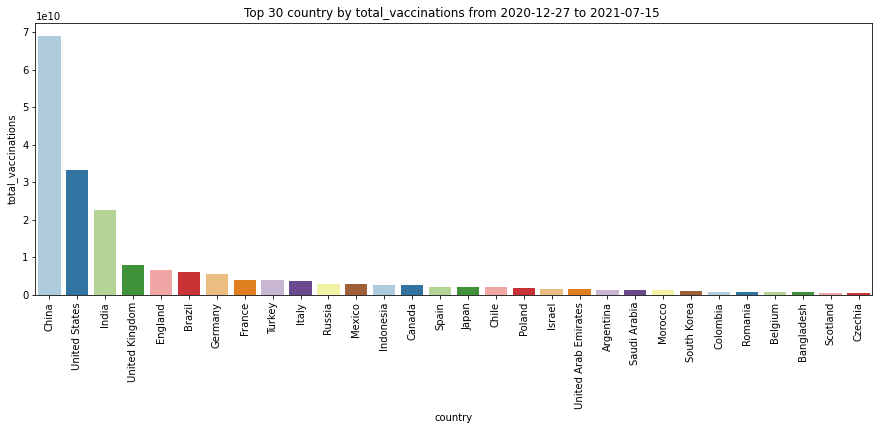

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=gvaccountry,x=gvaccountry.index,y='total_vaccinations',palette='Paired')
plt.title("Top 30 country by total_vaccinations from 2020-12-27 to 2021-07-15 ")
plt.xticks(rotation='vertical')
plt.show()

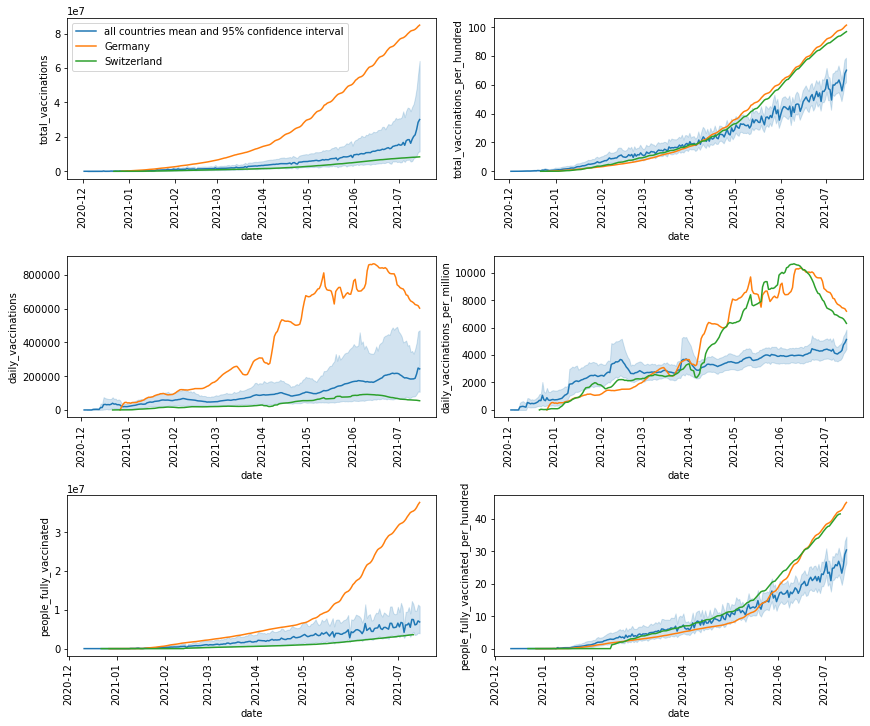

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
sns.lineplot(data=data,x='date',y='total_vaccinations')
sns.lineplot(data=Germany,x='date',y='total_vaccinations')
sns.lineplot(data=Switzerland,x='date',y='total_vaccinations')
plt.xticks(rotation='vertical')
plt.legend(['all countries mean and 95% confidence interval','Germany','Switzerland'],loc='best')

plt.subplot(3,2,2)
sns.lineplot(data=data,x='date',y='total_vaccinations_per_hundred')
sns.lineplot(data=Germany,x='date',y='total_vaccinations_per_hundred')
sns.lineplot(data=Switzerland,x='date',y='total_vaccinations_per_hundred')
plt.xticks(rotation='vertical')

plt.subplot(3,2,3)
sns.lineplot(data=data,x='date',y='daily_vaccinations')
sns.lineplot(data=Germany,x='date',y='daily_vaccinations')
sns.lineplot(data=Switzerland,x='date',y='daily_vaccinations')
plt.xticks(rotation='vertical')


plt.subplot(3,2,4)
sns.lineplot(data=data,x='date',y='daily_vaccinations_per_million')
sns.lineplot(data=Germany,x='date',y='daily_vaccinations_per_million')
sns.lineplot(data=Switzerland,x='date',y='daily_vaccinations_per_million')
plt.xticks(rotation='vertical')

plt.subplot(3,2,5)
sns.lineplot(data=data,x='date',y='people_fully_vaccinated')
sns.lineplot(data=Germany,x='date',y='people_fully_vaccinated')
sns.lineplot(data=Switzerland1,x='date',y='people_fully_vaccinated')
plt.xticks(rotation='vertical')

plt.subplot(3,2,6)
sns.lineplot(data=data,x='date',y='people_fully_vaccinated_per_hundred')
sns.lineplot(data=Germany,x='date',y='people_fully_vaccinated_per_hundred')
sns.lineplot(data=Switzerland1,x='date',y='people_fully_vaccinated_per_hundred')
plt.xticks(rotation='vertical')

plt.tight_layout(pad=0.4)
plt.show()

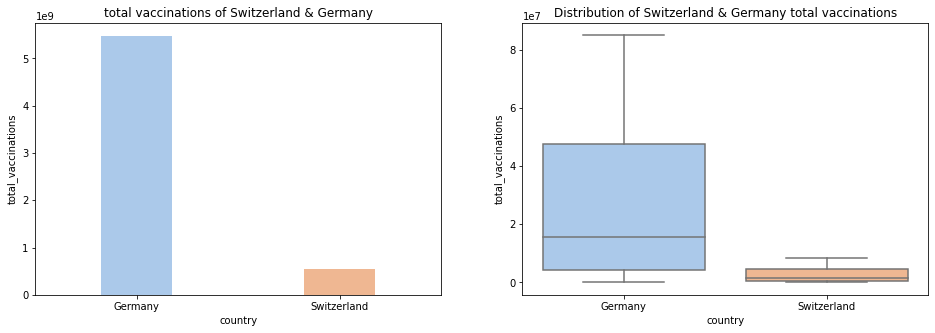

In [ ]:
fig= plt.figure(figsize=(16,5))
ax=plt.subplot(1,2,1)
gcountry = pd.DataFrame(mydata.groupby(['country'])['total_vaccinations'].sum()).reset_index()
sns.barplot(data=gcountry, x='country', y='total_vaccinations',palette='pastel')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

ax.set(title='total vaccinations of Switzerland & Germany')  

ax=plt.subplot(1,2,2)
sns.boxplot(y='total_vaccinations',x='country',data=mydata,palette='pastel',width=0.8)
ax.set(title='Distribution of Switzerland & Germany total vaccinations')
plt.show()

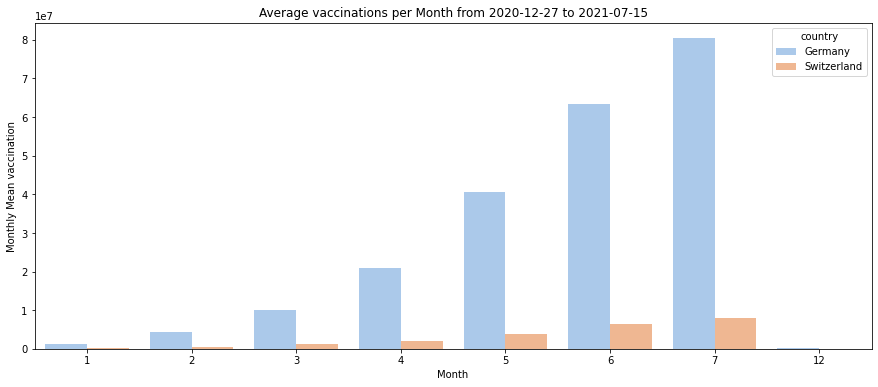

In [ ]:
# Average Monthly total_vaccinations Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
gmonth = pd.DataFrame(mydata.groupby(['month', 'country'])['total_vaccinations'].mean()).reset_index()
sns.barplot(data=gmonth, x='month', y='total_vaccinations', hue='country', ax=axes,palette='pastel')
axes.set(xlabel='Month', ylabel='Monthly Mean vaccination', title='Average vaccinations per Month from 2020-12-27 to 2021-07-15')
plt.show()

In [ ]:
print(mydata.index[[0,-1]]) # Range of time stamp

DatetimeIndex(['2020-12-27', '2021-07-15'], dtype='datetime64[ns]', name='date', freq=None)


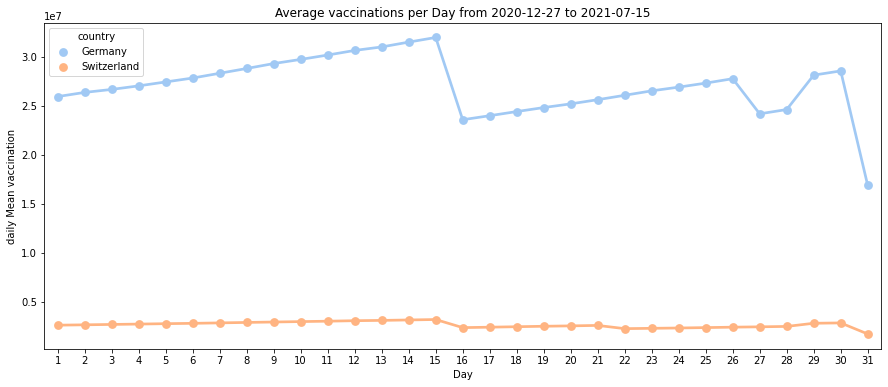

In [ ]:
# Average daily total_vaccinations Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(mydata.groupby(['day', 'country'])['total_vaccinations'].mean()).reset_index()
sns.pointplot(data=group_month, x='day', y='total_vaccinations', hue='country', ax=axes,palette='pastel')
axes.set(xlabel='Day', ylabel='daily Mean vaccination', title='Average vaccinations per Day from 2020-12-27 to 2021-07-15')
plt.show()

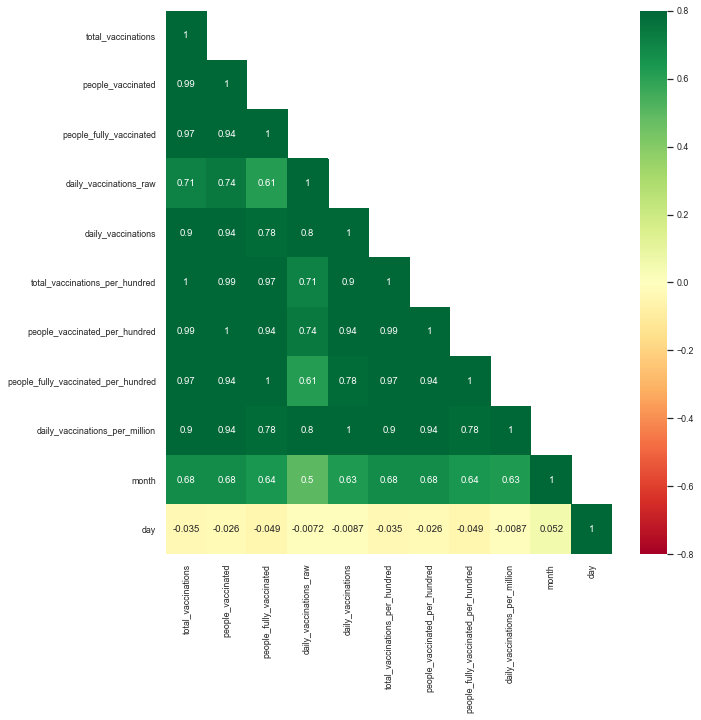

In [ ]:
corr=Germany.corr()
sns.set(font_scale=0.8)
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

with sns.axes_style("white"):
    fig = plt.figure(figsize=(10, 10))
    fig=sns.heatmap(corr, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
    plt.show()

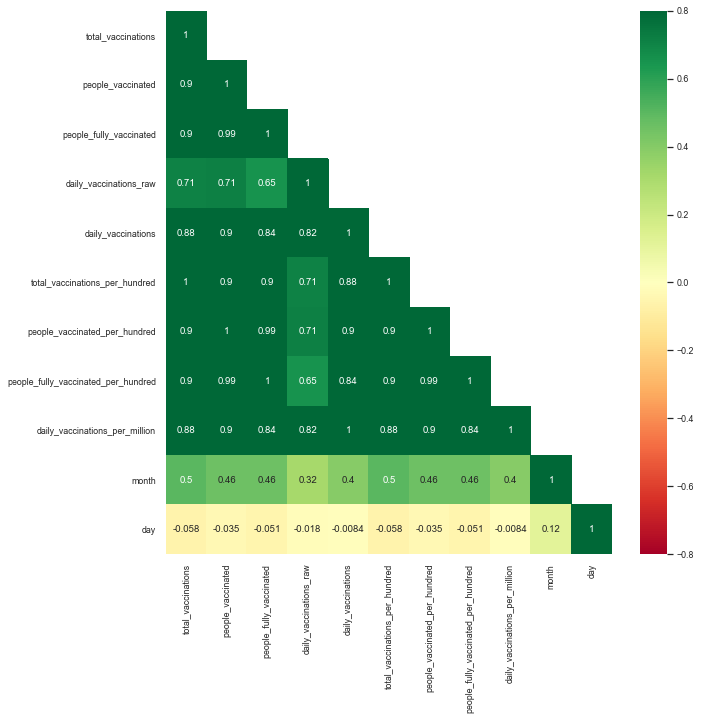

In [ ]:
corr=Switzerland1.corr()
sns.set(font_scale=0.8)
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

with sns.axes_style("white"):
    fig = plt.figure(figsize=(10, 10))
    fig=sns.heatmap(corr, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
    plt.show()

## Prepare Data for Machine learning

In [96]:
Switzerland1 = Switzerland1.drop(['source_name', 'iso_code', 'source_website'], axis = 1)
Germany = Germany.drop(['source_name', 'iso_code', 'source_website'], axis = 1)

In [107]:
Germany1 = Germany.iloc[:,-3:]

In [97]:
X = Germany.iloc[:,-3:].values
y = Germany.iloc[:,[1]].values

In [98]:
X

array([[2020,   12,   27],
       [2020,   12,   28],
       [2020,   12,   29],
       [2020,   12,   30],
       [2020,   12,   31],
       [2021,    1,    1],
       [2021,    1,    2],
       [2021,    1,    3],
       [2021,    1,    4],
       [2021,    1,    5],
       [2021,    1,    6],
       [2021,    1,    7],
       [2021,    1,    8],
       [2021,    1,    9],
       [2021,    1,   10],
       [2021,    1,   11],
       [2021,    1,   12],
       [2021,    1,   13],
       [2021,    1,   14],
       [2021,    1,   15],
       [2021,    1,   16],
       [2021,    1,   17],
       [2021,    1,   18],
       [2021,    1,   19],
       [2021,    1,   20],
       [2021,    1,   21],
       [2021,    1,   22],
       [2021,    1,   23],
       [2021,    1,   24],
       [2021,    1,   25],
       [2021,    1,   26],
       [2021,    1,   27],
       [2021,    1,   28],
       [2021,    1,   29],
       [2021,    1,   30],
       [2021,    1,   31],
       [2021,    2,    1],
 

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160, 1)
(41, 3)
(41, 1)


In [100]:
#scaling x Germany
scx = StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)

## Train your model

Germany

#### Linear regression

In [197]:
slr = LinearRegression()

# Train the model using the training sets 
slr.fit(X_train, y_train)
# Model prediction on train data
y_pred_train_lr = slr.predict(X_train)
# Model prediction on test data
y_pred_lr = slr.predict(X_test)

# Model Evaluation
R2_train=metrics.r2_score(y_train, y_pred_train_lr)
print('R2_train:',R2_train)
MAE_train=metrics.mean_absolute_error(y_train, y_pred_train_lr)
print('MAE_train:',MAE_train)
MSE_train=metrics.mean_squared_error(y_train, y_pred_train_lr)
print('MSE_train:',MSE_train)
RMSE_train= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lr))
print('RMSE_train:',RMSE_train)

R2_test=metrics.r2_score(y_test, y_pred_lr)
print('R2_test:',R2_test)
MAE_test=metrics.mean_absolute_error(y_test, y_pred_lr)
print('MAE_test:',MAE_test)
MSE_test=metrics.mean_squared_error(y_test, y_pred_lr)
print('MSE_test:',MSE_test)
RMSE_test=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE_test:',RMSE_test)


R2_train: 0.9055727481239205
MAE_train: 6874146.543923201
MSE_train: 65000087031231.95
RMSE_train: 8062263.145744621
R2_test: 0.9179798752995745
MAE_test: 6843930.496918703
MSE_test: 60877510441703.21
RMSE_test: 7802404.144986545


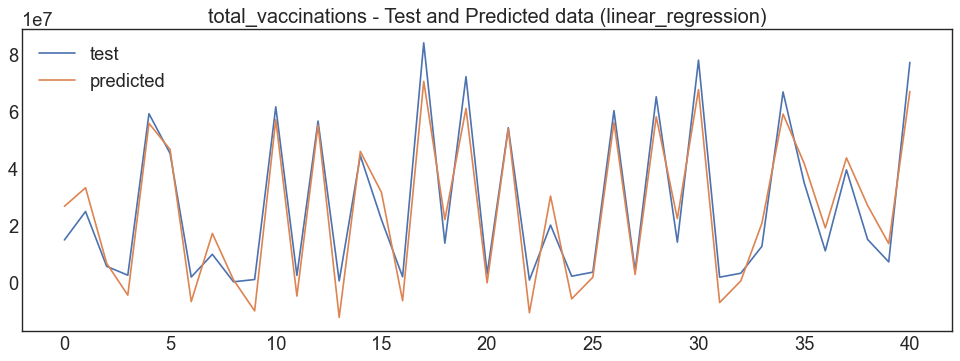

In [203]:
plt.figure(figsize=(15, 5), dpi=80)
sns.set(font_scale=1.5)
plt.style.use('seaborn-white')
plt.plot(y_test, label="test")
plt.plot(y_pred_lr, label="predicted")
plt.title("total_vaccinations - Test and Predicted data (linear_regression)")
plt.legend()
plt.show()

#### Ridge regression

In [ ]:
ridge = Ridge()
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X_train, y_train)
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

In [200]:
ridge_regression = Ridge(alpha=20)
y_pred_ridge_Reg = ridge_regression.fit(X_train, y_train).predict(X_test)
y_pred_train_ridge_Reg = ridge_regression.predict(X_train)

In [201]:
# Model Evaluation
R2_train_r=metrics.r2_score(y_train, y_pred_train_ridge_Reg)
print('R2_train:',R2_train_r)
MAE_train_r=metrics.mean_absolute_error(y_train, y_pred_train_ridge_Reg)
print('MAE_train:',MAE_train_r)
MSE_train_r=metrics.mean_squared_error(y_train, y_pred_train_ridge_Reg)
print('MSE_train:',MSE_train_r)
RMSE_train_r= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_ridge_Reg))
print('RMSE_train:',RMSE_train_r)

R2_test_r=metrics.r2_score(y_test, y_pred_ridge_Reg)
print('R2_test:',R2_test_r)
MAE_test_r=metrics.mean_absolute_error(y_test, y_pred_ridge_Reg)
print('MAE_test:',MAE_test_r)
MSE_test_r=metrics.mean_squared_error(y_test, y_pred_ridge_Reg)
print('MSE_test:',MSE_test_r)
RMSE_test_r=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_Reg))
print('RMSE_test:',RMSE_test_r)

R2_train: 0.8608750897789375
MAE_train: 8123920.206863718
MSE_train: 95768235259552.42
RMSE_train: 9786124.629267318
R2_test: 0.8791566875448081
MAE_test: 7740782.144024087
MSE_test: 89693109376152.61
RMSE_test: 9470644.612493524


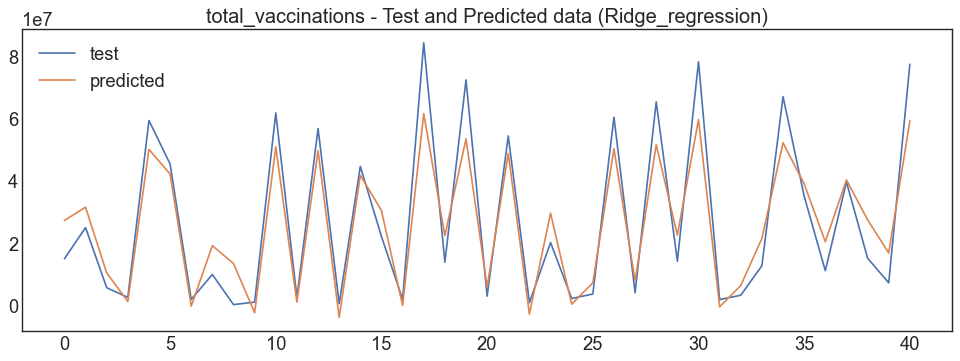

In [202]:
plt.figure(figsize=(15, 5), dpi=80)
sns.set(font_scale=1.5)
plt.style.use('seaborn-white')
plt.plot(y_test, label="test")
plt.plot(y_pred_ridge_Reg, label="predicted")
plt.title("total_vaccinations - Test and Predicted data (Ridge_regression)")
plt.legend()
plt.show()

#### Lasso Regression

In [ ]:
lasso = Lasso()

parameters = {"alpha":[ 1e-8, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(X_train, y_train)
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

In [205]:
lasso_regression = Lasso(alpha= 20)
y_pred_lasso_Reg = lasso_regression.fit(X_train, y_train).predict(X_test)
y_pred_train_lasso_Reg = lasso_regression.predict(X_train)

In [206]:
# Model Evaluation
R2_train_la=metrics.r2_score(y_train, y_pred_train_lasso_Reg)
print('R2_train:',R2_train_la)
MAE_train_la=metrics.mean_absolute_error(y_train, y_pred_train_lasso_Reg)
print('MAE_train:',MAE_train_la)
MSE_train_la=metrics.mean_squared_error(y_train, y_pred_train_lasso_Reg)
print('MSE_train:',MSE_train_la)
RMSE_train_la= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lasso_Reg))
print('RMSE_train:',RMSE_train_la)

R2_test_la=metrics.r2_score(y_test, y_pred_lasso_Reg)
print('R2_test:',R2_test_la)
MAE_test_la=metrics.mean_absolute_error(y_test, y_pred_lasso_Reg)
print('MAE_test:',MAE_test_la)
MSE_test_la=metrics.mean_squared_error(y_test, y_pred_lasso_Reg)
print('MSE_test:',MSE_test_la)
RMSE_test_la=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_Reg))
print('RMSE_test:',RMSE_test_la)

R2_train: 0.9055727481200453
MAE_train: 6874144.717820875
MSE_train: 65000087033899.516
RMSE_train: 8062263.145910056
R2_test: 0.9179798965396908
MAE_test: 6843928.276379174
MSE_test: 60877494676725.914
RMSE_test: 7802403.134722399


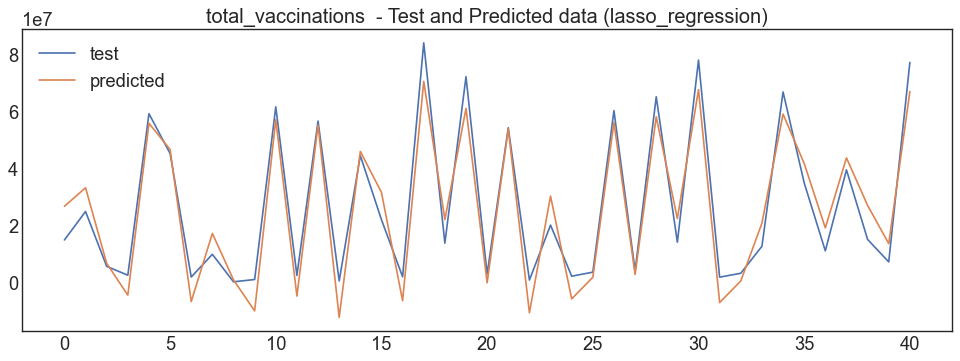

In [207]:
plt.figure(figsize=(15, 5), dpi=80)
sns.set(font_scale=1.5)
plt.style.use('seaborn-white')
plt.plot( y_test, label="test")
plt.plot(y_pred_lasso_Reg, label="predicted")
plt.title("total_vaccinations  - Test and Predicted data (lasso_regression)")
plt.legend()
plt.show()

#### SVR

In [101]:
#scaling y Germany
scy = StandardScaler()
y1_train = scy.fit_transform(y_train)
y1_test = scy.transform(y_test)

In [ ]:
regressor = SVR()
svrparameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
SVReg = GridSearchCV(estimator=regressor, param_grid=svrparameters, scoring='neg_mean_squared_error', cv=5)
SVReg.fit(X_train, y1_train)
print(SVReg.best_params_)
print(SVReg.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-0.030590352670566638


In [208]:
SVRregressor = SVR(kernel= 'rbf',gamma= 0.1,C= 1)
y_pred_SVR=SVRregressor.fit(X_train,y1_train).predict(X_test)
y_train_pred_SVR=SVRregressor.predict(X_train)

In [209]:
# Model Evaluation
R2_train_svr=metrics.r2_score(y1_train, y_train_pred_SVR)
print('R2_train:',R2_train_svr)
MAE_train_svr=metrics.mean_absolute_error(y1_train, y_train_pred_SVR)
print('MAE_train:',MAE_train_svr)
MSE_train_svr=metrics.mean_squared_error(y1_train, y_train_pred_SVR)
print('MSE_train:',MSE_train_svr)
RMSE_train_svr= np.sqrt(metrics.mean_squared_error(y1_train, y_train_pred_SVR))
print('RMSE_train:',RMSE_train_svr)

R2_test_svr=metrics.r2_score(y1_test, y_pred_SVR)
print('R2_test:',R2_test_svr)
MAE_test_svr=metrics.mean_absolute_error(y1_test, y_pred_SVR)
print('MAE_test:',MAE_test_svr)
MSE_test_svr=metrics.mean_squared_error(y1_test, y_pred_SVR)
print('MSE_test:',MSE_test_svr)
RMSE_test_svr=np.sqrt(metrics.mean_squared_error(y1_test, y_pred_SVR))
print('RMSE_test:',RMSE_test_svr)

R2_train: 0.9906032638981331
MAE_train: 0.0766894499974479
MSE_train: 0.009396736101866884
RMSE_train: 0.09693676341753361
R2_test: 0.9923907673618744
MAE_test: 0.0715547670469384
MSE_test: 0.008204662728525994
RMSE_test: 0.09057959333385193


In [210]:
accuracies = cross_val_score(estimator = SVRregressor, X = X_train, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.83 %
Standard Deviation: 0.40 %


In [211]:
y_set_train=scy.inverse_transform(y_train_pred_SVR)

In [212]:
y_set=scy.inverse_transform(y_pred_SVR)
y_set

array([17901755.63293932, 27517597.00692394,  4504274.39034146,
        4295981.62216467, 58759864.18893792, 45958978.81614143,
         893215.30366132,  9500994.6676444 ,  3007882.84781033,
        -517452.31644696, 62028796.46903066,  3663145.66717045,
       56907101.54163173,   122165.55559774, 45093477.00361334,
       24894896.95999366,  1237146.72552161, 82797258.30092594,
       17204001.91549155, 66565102.94348615,  1334904.44117735,
       52954605.24527964,  -455623.64764536, 22765649.0047624 ,
        2062387.22077053,   859115.27761466, 59638194.77955223,
        1077012.04010758, 63976040.34555486, 17857216.20241076,
       73399409.23749223,   592634.91820408,  1024147.05461912,
       14760434.7704418 , 65405301.20575706, 36948598.14216585,
       12104278.71083101, 41111501.41033512, 18214808.12507545,
        6912413.61389076, 70767321.42207104])

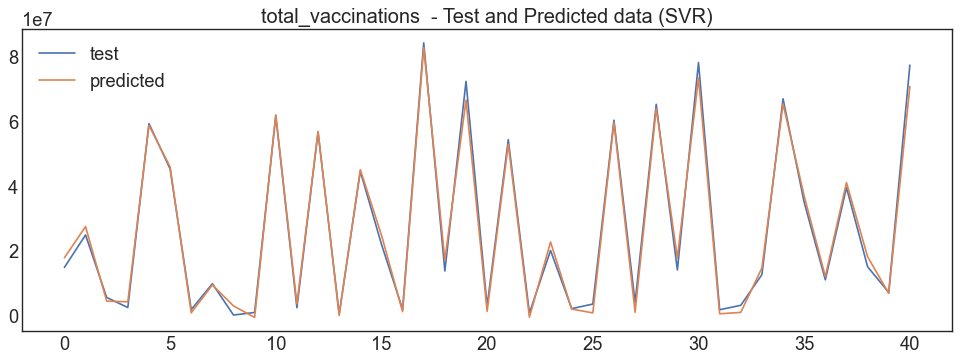

In [213]:
plt.figure(figsize=(15, 5), dpi=80)
sns.set(font_scale=1.5)
plt.style.use('seaborn-white')
plt.plot( y_test, label="test")
plt.plot(y_set, label="predicted")
plt.title("total_vaccinations  - Test and Predicted data (SVR)")
plt.legend()
plt.show()

#### Random Forest

In [ ]:
regressorRF = RandomForestRegressor(random_state=0)

In [ ]:
parameter = {'n_estimators': [100,200,300,500], 'max_depth':[5, 8, 10, 15, 20, 25, 30, 40, 60]}
randomforest = GridSearchCV(estimator=regressorRF, param_grid=parameter,scoring='neg_mean_squared_error', cv=5)
randomforest.fit(X_train, y1_train)
print(randomforest.best_params_)
print(randomforest.best_score_)


{'max_depth': 8, 'n_estimators': 300}
-0.0034241889354934066


In [230]:
RF = RandomForestRegressor(random_state=0,n_estimators=300, max_depth=8)
y_pred_RF=RF.fit(X_train,y1_train).predict(X_test)
y_train_pred_RF=RF.predict(X_train)

In [103]:
# Model Evaluation
R2_train_Rf=metrics.r2_score(y1_train, y_train_pred_RF)
print('R2_train:',R2_train_Rf)
MAE_train_Rf=metrics.mean_absolute_error(y1_train, y_train_pred_RF)
print('MAE_train:',MAE_train_Rf)
MSE_train_Rf=metrics.mean_squared_error(y1_train, y_train_pred_RF)
print('MSE_train:',MSE_train_Rf)
RMSE_train_Rf= np.sqrt(metrics.mean_squared_error(y1_train, y_train_pred_RF))
print('RMSE_train:',RMSE_train_Rf)

R2_test_Rf=metrics.r2_score(y1_test, y_pred_RF)
print('R2_test:',R2_test_Rf)
MAE_test_Rf=metrics.mean_absolute_error(y1_test, y_pred_RF)
print('MAE_test:',MAE_test_Rf)
MSE_test_Rf=metrics.mean_squared_error(y1_test, y_pred_RF)
print('MSE_test:',MSE_test_Rf)
RMSE_test_Rf=np.sqrt(metrics.mean_squared_error(y1_test, y_pred_RF))
print('RMSE_test:',RMSE_test_Rf)

R2_train: 0.9999289395788886
MAE_train: 0.005080688956114451
MSE_train: 7.106042111133124e-05
RMSE_train: 0.008429734344054458
R2_test: 0.9998475055022579
MAE_test: 0.009142959706473278
MSE_test: 0.00016442734523075035
RMSE_test: 0.012822922647772244


In [155]:
acc = cross_val_score(estimator = RF, X = X_train, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(acc.mean()*100))
print("Standard Deviation: {:.2f} %".format(acc.std()*100))

Accuracy: 99.55 %
Standard Deviation: 1.02 %


In [104]:
RF.feature_importances_

array([0.09201859, 0.87954389, 0.02843752])

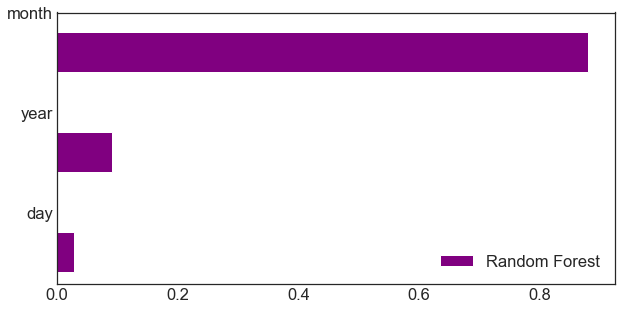

In [108]:
feature_importance=pd.DataFrame({'RF':RF.feature_importances_},index=Germany1.columns)
feature_importance.sort_values(by='RF',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(10,5))
RF_feature=ax.barh(index,feature_importance['RF'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [109]:
y_set_RF1=scy.inverse_transform(y_pred_RF)
y_set_RF1

array([14895948.03000005, 24919409.17500001,  5555346.88566672,
        2309588.92333324, 58589292.24333325, 45510053.92111117,
        1816477.99166672,  9727189.44833329,   694436.4066667 ,
        1073772.26578308, 62530914.50583337,  2309588.92333324,
       56179935.08012695,   485259.37217859, 43990506.65722226,
       22004776.40666664,  2083605.90722231, 84160443.11666659,
       13290220.66999994, 72082472.09673029,  2958029.46000007,
       53868091.51741271,   773460.86877774, 20499907.2466667 ,
        2133329.53333341,  3671196.36838093, 60205368.73433324,
        3970390.11060317, 64606884.36372234, 13290220.66999994,
       77945700.15333346,  1704536.18833334,  3139868.89400005,
       12508488.76666664, 67506908.26175408, 34764775.55833337,
       11018308.06555551, 39655957.64666662, 15253217.05000005,
        7080479.67333339, 77273846.93000013])

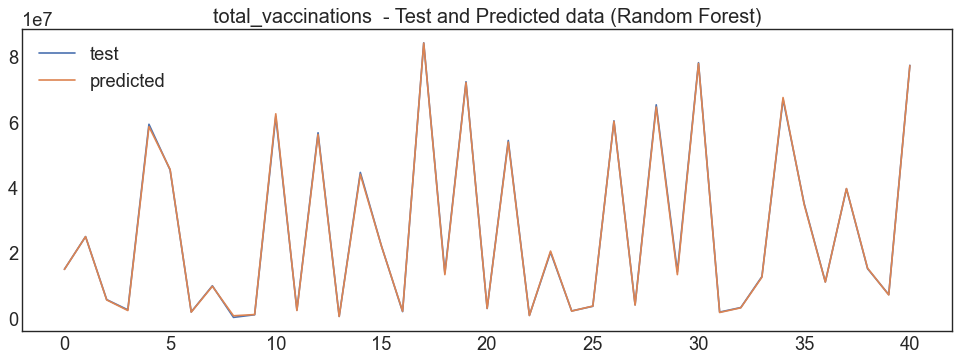

In [214]:
plt.figure(figsize=(15, 5), dpi=80)
sns.set(font_scale=1.5)
plt.style.use('seaborn-white')
plt.plot( y_test, label="test")
plt.plot(y_set_RF1, label="predicted")
plt.title("total_vaccinations  - Test and Predicted data (Random Forest)")
plt.legend()
plt.show()

In [269]:
y_pred1=SVRregressor.predict(scx.transform([[2021,10,10]]))
y_pred2=scy.inverse_transform(y_pred1)
y_pred2

array([1.17151873e+08])

In [265]:
y_pred3=RF.predict(scx.transform([[2021,10,10]]))
y_pred4=scy.inverse_transform(y_pred3)
y_pred4

array([63815020.52066675])

In [264]:
y_pred5=lasso_regression.predict(scx.transform([[2021,10,10]]))
y_pred5

array([1.09776805e+08])

### Switzerland

#### AutoML

In [ ]:
%%capture
!pip install pycaret
import pandas as pd

In [21]:
from pycaret.regression import *

In [37]:
Switzerland2=Switzerland1.loc[:,['total_vaccinations','vaccines','month','day']]

In [39]:
reg = setup(data = Switzerland2,target = 'total_vaccinations',numeric_features =['vaccines','month','day'],normalize = True,session_id = 6563 )

,Description,Value
0,session_id,6563
1,Target,total_vaccinations
2,Original Data,"(202, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(141, 3)"


In [40]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.724058e+04,1.109847e+09,2.961502e+04,0.9998,0.0855,0.0572,0.356
dt,Decision Tree Regressor,4.858788e+04,4.909371e+09,6.494885e+04,0.9992,0.1571,0.0893,0.013
gbr,Gradient Boosting Regressor,8.144689e+04,1.673112e+10,1.184514e+05,0.9974,0.3830,1.7240,0.040
ada,AdaBoost Regressor,2.612980e+05,1.207691e+11,3.379998e+05,0.9807,0.7781,2.1801,0.036
rf,Random Forest Regressor,1.402454e+05,3.117777e+11,2.486222e+05,0.9547,0.5579,62.9888,0.410
knn,K Neighbors Regressor,3.865136e+05,1.103413e+12,6.337223e+05,0.8377,0.9615,113.3804,0.061
lightgbm,Light Gradient Boosting Machine,7.360638e+05,2.172782e+12,1.223954e+06,0.6673,1.2038,139.0315,0.021
en,Elastic Net,1.713771e+06,5.411894e+12,2.198630e+06,0.1610,1.8482,172.3501,0.013
huber,Huber Regressor,1.706740e+06,5.627981e+12,2.344801e+06,0.1182,1.7742,114.3988,0.015
omp,Orthogonal Matching Pursuit,1.515500e+06,6.499981e+12,2.145306e+06,0.0094,1.6592,241.6824,0.013


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6563, verbose=0, warm_start=False)

In [41]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9518.0007,1.663440e+08,12897.4430,1.0000,0.0561,0.0240
1,17788.9500,1.079605e+09,32857.3392,0.9998,0.0107,0.0074
2,18488.7464,6.232414e+08,24964.8033,0.9999,0.0222,0.0152
3,11851.6407,3.106437e+08,17625.0875,1.0000,0.5370,0.4047
4,19838.3607,1.646702e+09,40579.5809,0.9997,0.0273,0.0181
5,23789.2943,2.060945e+09,45397.6313,0.9997,0.0416,0.0189
6,32894.6136,4.079589e+09,63871.6625,0.9993,0.0233,0.0124
7,11697.8729,4.606262e+08,21462.2048,0.9999,0.0834,0.0389
8,12422.7986,2.785243e+08,16689.0464,1.0000,0.0271,0.0179
9,14115.5507,3.922520e+08,19805.3521,0.9999,0.0258,0.0140


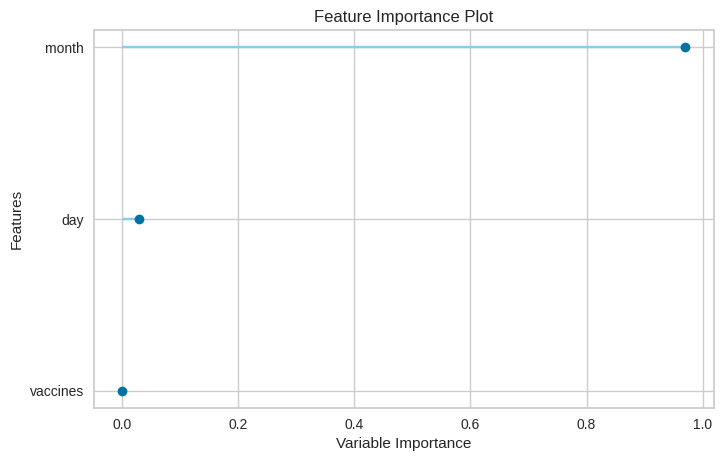

In [42]:
plot_model(estimator = et, plot = 'feature')

In [31]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Test the model and show the metrics

In [270]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression','Lasso Regression','Support Vector Machines', 
              'Random Forest'],
    'R2 Test': [R2_test,R2_test_r,
              R2_test_la, R2_test_svr, R2_test_Rf],
    'R2 Train': [R2_train,R2_train_r,
              R2_train_la, R2_train_svr, R2_train_Rf]})
result_df = results.sort_values(by='R2 Test', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(5)

,R2 Test,R2 Train
Model,,
Random Forest,0.999848,0.999929
Support Vector Machines,0.992391,0.990603
Lasso Regression,0.917980,0.905573
Linear Regression,0.917980,0.905573
Ridge Regression,0.879157,0.860875


## Save your final model

In [249]:
import pickle

In [250]:
from joblib import dump, load
dump(SVRregressor, 'SVRmodelGermany_covid19.joblib')

['SVRmodelGermany_covid19.joblib']

## Send us the Result (Maktabkhoone)